# Setting-up ToR-ORd and Grandi Models in Myokit
This notebook will walk you through how the ToR-ORd and Grandi Models were set up and used in this study. First go to cellml.org, click the models tab and then search for the Tomek et al. and Grandi et al. models. Download the endocardial version of each model. Save *grandi_pasqualini_bers_2010_flat.cellml* and *Tomek_model_endo.cellml* into a folder where you would like to keep the models. Then, use the cellml_to_mmt functions from the important_functions.py file to translate the cellml files into mmt files. 

In [1]:
# import functions
from important_functions import cellml_to_mmt, run_model, get_ind
import matplotlib.pyplot as plt


In [1]:
# Convert files from cellml to mmt
cellml_to_mmt('./models/grandi_pasqualini_bers_2010_flat.cellml', './models/grandi_flat.mmt')
cellml_to_mmt('./models/Tomek_model_endo.cellml', './models/tor_ord_endo2.mmt')

The following updates were then made to tor_ord_endo2.mmt: 

1. Comment out lines 903-919 and 834-836
2. Add the following three sections under the initial conditions:

```
[engine] 
time = 0 [ms] 
    in [ms] 
    bind time 
pace = 0 
    bind pace 

[stimulus]
i_stim = engine.pace * amplitude
    in [A/F]
amplitude = -10 [A/F]
    in [A/F]

[multipliers]
i_cal_pca_multiplier = 1
i_kr_multiplier = 1
i_ks_multiplier = 1
i_nal_multiplier = 1
i_na_multiplier = 1
i_to_multiplier = 1
i_k1_multiplier = 1
i_NCX_multiplier = 1
i_nak_multiplier = 1
i_kb_multiplier = 1
i_bias_multiplier = 0
i_bias1_multiplier = 0

[Ibias]
Ibias = 1 * membrane.vffrt/membrane.vffrt * multipliers.i_bias_multiplier 
Ibias1 = 1 * membrane.vffrt/membrane.vffrt * multipliers.i_bias1_multiplier 
```

3. Multiply the PCa_b equation by multipliers.i_cal_pca_multiplier in line 146; the GKr_b equation by multipliers.i_kr_multiplier in line 311; the GKs_b equation by multipliers.i_ks_multiplier in line 345; the GNaL_b equation by multipliers.i_nal_multiplier in line 688; the GNa equation by multipliers.i_na_multiplier in line 367; the Gto_b equation by multipliers.i_to_multiplier in line 759; the GK1_b equation by multipliers.i_k1_multiplier in line 279; the Gncx_b equation by multipliers.i_NCX_multiplier in line 429; the Pnak_b equation by multipliers.i_nak_multiplier in line 637; and the GKb_b equation by multipliers.i_kb_multiplier in line 295.

4. Add the following equation to the [membrane] section at line 951: 
```
i_ion = INa.INa + INaL.INaL + Ito.Ito + ICaL.ICaL + ICaL.ICaNa + ICaL.ICaK + IKr.IKr + IKs.IKs + IK1.IK1 + INaCa.INaCa_i + INaCa.INaCa_ss + INaK.INaK + INab.INab + IKb.IKb + IpCa.IpCa + ICab.ICab + ICl.IClCa + ICl.IClb + I_katp.I_katp + Ibias.Ibias + Ibias.Ibias1
```

5. At line 952, change the dot(v) equation to:

```
dot(v) = -(i_ion + stimulus.i_stim)
```

6. Add the following section at line 1032:

```
[[protocol]]
#Level  Start    Length   Period   Multiplier
#5.3      0       1        1000      0
```

7. Change every ```membrane.Istim``` to ```stimulus.i_stim```

Now check to make sure that this model works properly.


INFO:root:running build_ext
INFO:root:building 'myokit_sim_1_1058785203555424114' extension
INFO:root:creating build
INFO:root:creating build\temp.win-amd64-cpython-39
INFO:root:creating build\temp.win-amd64-cpython-39\Release
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users\Kristin
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users\Kristin\AppData
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users\Kristin\AppData\Local
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users\Kristin\AppData\Local\Temp
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users\Kristin\AppData\Local\Temp\tmp3hdmpli7myokit
INFO:root:"C:\Program Files (x86)\Microsoft Visual Studio\2019\BuildTools\VC\Tools\MSVC\14.29.30133\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD -IC:\Users\Kristin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\lo

Text(0, 0.5, 'Membrane Potential (mV)')

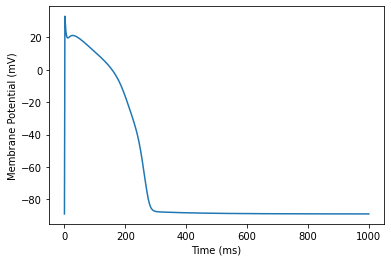

In [2]:
# Run and Plot ToR-ORd Model
dat, IC = run_model([get_ind()], 1)
plt.plot(dat['engine.time'], dat['membrane.v'])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')

Now lets adjust the Grandi model!

The following updates were made: 

1. Comment out lines 96-97, 458-467 and 527-529
2. Add the following three sections under the initial conditions:

```
[engine]
time = 0 [ms] 
    in [ms]
    bind time
pace = 0 
    bind pace

[stimulus]
i_stim = engine.pace * amplitude
    in [A/F]
amplitude = -1 [A/F]
    in [A/F]
    
[multipliers]
i_cal_pca_multiplier = 1 
i_kr_multiplier = 1 
i_ks_multiplier = 1 
i_nal_multiplier = 0 #not in model
i_na_multiplier = 1
i_to_multiplier = 1
i_k1_multiplier = 1
i_NCX_multiplier = 1
i_nak_multiplier = 1
i_kb_multiplier = 1
i_bias_multiplier = 0
i_bias1_multiplier = 0

[Ibias]
Ibias = 1 * membrane.v/membrane.v * multipliers.i_bias_multiplier 
Ibias1 = 1 * membrane.v/membrane.v * multipliers.i_bias1_multiplier 

[INaL]
#added from TORORD
GNaL = GNaL_b
    in [mS/uF]
GNaL_b = 0.0279 * multipliers.i_nal_multiplier * 356 / 294 #356 is peak Grandi sodium and 293 is peak Tor-ORd
INaL = INaL_junc +INaL_sl #split into junc and sl components because that is how INa is modeled in grandi
    in [A/F]
    oxmeta: membrane_persistent_sodium_current
INaL_junc = GNaL * (membrane.v - parameters.ena_junc) * mL * ((1 - fINaLp) * hL + fINaLp * hLp)
    in [A/F]
INaL_sl = GNaL * (membrane.v - parameters.ena_sl) * mL * ((1 - fINaLp) * hL + fINaLp * hLp)
    in [A/F]
fINaLp = 1 / (1 + CaMK.KmCaMK / CaMK.CaMKa)
    in [1]
dot(hL) = (hLss - hL) / thL
    in [1]
dot(hLp) = (hLssp - hLp) / thLp
    in [1]
hLss = 1 / (1 + exp((membrane.v + 87.61 [mV]) / 7.488 [mV]))
    in [1]
hLssp = 1 / (1 + exp((membrane.v + 93.81 [mV]) / 7.488 [mV]))
    in [1]
dot(mL) = (mLss - mL) / tmL
    in [1]
mLss = 1 / (1 + exp(-(membrane.v + 42.85 [mV]) / 5.264 [mV]))
    in [1]
thL = 200 [ms]
    in [ms]
thLp = 3 * thL
    in [ms]
tmL = 0.1292 [ms] * exp(-((membrane.v + 45.79 [mV]) / 15.54 [mV]) ^ 2) + 0.06487 [ms] * exp(-((membrane.v - 4.823 [mV]) / 51.12 [mV]) ^ 2)
    in [ms]

[CaMK]
#added from TORORD
CaMKa = CaMKb + CaMKt
    in [mM]
CaMKb = CaMKo * (1 [mM] - CaMKt) / (1 + KmCaM / intracellular_ions.cai)
    in [mM]
CaMKo = 0.05
    in [1]
dot(CaMKt) = aCaMK * CaMKb * (CaMKb + CaMKt) - bCaMK * CaMKt
    in [mM]
KmCaM = 0.0015 [mM]
    in [mM]
KmCaMK = 0.15 [mM]
    in [mM]
aCaMK = 0.05 [1/mM/ms]
    in [1/mM/ms]
bCaMK = 0.00068 [mS/uF]
    in [mS/uF]

[intracellular_ions]
dot(cai) = -SR_Fluxes.J_serca * parameters.Vsr / parameters.Vmyo - Cytosolic_Ca_Buffers.J_CaB_cytosol + parameters.J_ca_slmyo / parameters.Vmyo * (Ca_Concentrations.Ca_sl - cai)
```

3. Multiply the pCa, pk, and PNa equation by multipliers.i_cal_pca_multiplier in lines 783, 785, and 787; the gkr equation by multipliers.i_kr_multiplier in line 300; the I_ks equation by multipliers.i_ks_multiplier in line 312; the GNaL_b equation by multipliers.i_nal_multiplier in line 130 (should already be there by pasting the [INaL] section code above); the GNa equation by multipliers.i_na_multiplier in line 613; the I_to equation by multipliers.i_to_multiplier in line 422; the I_ki equation by multipliers.i_k1_multiplier in line 278; the I_ncx equation by multipliers.i_NCX_multiplier in line 332; the I_nak equation by multipliers.i_nak_multiplier in line 398; and the gkp equation by multipliers.i_kb_multiplier in line 717.

4. Change the ```[membrane_potential]``` section to ```[membrane]``` and replace the I_tot equation at line 540 with:
```
i_ion = I_Na_tot + I_Cl_tot + I_Ca_tot + K_Concentration.I_K_tot + Ibias.Ibias + Ibias.Ibias1
```

5. At line 541, change the dot(V_m) equation to:

```
dot(v) = -(i_ion + stimulus.i_stim)
```

6. Add the following section at line 792:

```
[[protocol]]
#Level  Start    Length   Period   Multiplier
#1      0       5        1000      0
```

7. Change every ```membrane_potential.V_m``` to ```membrane.v``` 

8. Add the following equation to the initial values section: 

```
INaL.mL                             = 0.0001629 #added from TORORD
INaL.hL                             = 0.5255 #added from TORORD
INaL.hLp                            = 0.2872 #added from TORORD
CaMK.CaMKt                          = 0.0111 #added from TORORD
```

9. Replace the I_Na_tot_junc and I_Na_tot_sl equations at lines 484 and 488 with:

```
I_Na_tot_junc = I_Na.I_Na_junc + I_NaBK.I_nabk_junc + 3 * I_NCX.I_ncx_junc + 3 * I_NaK.I_nak_junc + I_Ca.I_CaNa_junc+ INaL.INaL_junc

I_Na_tot_sl = I_Na.I_Na_sl + I_NaBK.I_nabk_sl + 3 * I_NCX.I_ncx_sl + 3 * I_NaK.I_nak_sl + I_Ca.I_CaNa_sl + INaL.INaL_sl
```

10. Replace every ```Ca_i``` in ```[Ca_Concentrations]``` with ```intracellular_ions.cai``` and every ```Ca_Concentrations.Ca_i``` with ```intracellular_ions.cai```

11. Set the epi parameter in line 719 to 0 so that we make sure to use the endocardial version of the model. 

Now check to make sure that this model works properly.

INFO:root:running build_ext
INFO:root:building 'myokit_sim_1_8854249327740454962' extension
INFO:root:creating build
INFO:root:creating build\temp.win-amd64-cpython-39
INFO:root:creating build\temp.win-amd64-cpython-39\Release
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users\Kristin
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users\Kristin\AppData
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users\Kristin\AppData\Local
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users\Kristin\AppData\Local\Temp
INFO:root:creating build\temp.win-amd64-cpython-39\Release\Users\Kristin\AppData\Local\Temp\tmpb0groz8umyokit
INFO:root:"C:\Program Files (x86)\Microsoft Visual Studio\2019\BuildTools\VC\Tools\MSVC\14.29.30133\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD -IC:\Users\Kristin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\lo

Text(0, 0.5, 'Membrane Potential (mV)')

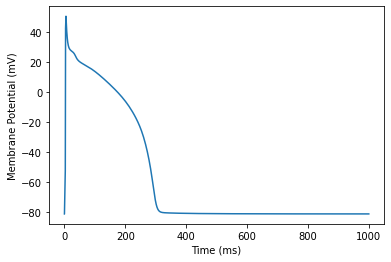

In [2]:
# Run and Plot Grandi Model
dat_grandi, IC = run_model([{'i_nal_multiplier': 0}], 1, prepace = 600, stim = 1, length = 5, model = 'grandi_flat.mmt')

plt.plot(dat_grandi['engine.time'], dat_grandi['membrane.v'])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')